In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv('Mall_Customers.csv')
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
data.drop(['Genre'], axis=1, inplace=True)
data.drop(['Age'], axis=1, inplace=True)

data.head()

,CustomerID,Annual Income (k$),Spending Score (1-100)
0,1,15,39
1,2,15,81
2,3,16,6
3,4,16,77
4,5,17,40


In [4]:
k_means = KMeans(n_clusters=3)
k_means.fit(data)

KMeans(n_clusters=3)

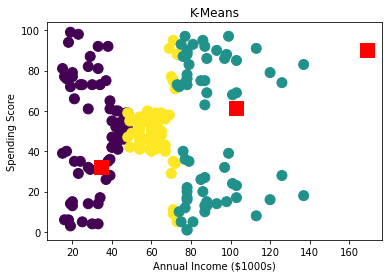

In [5]:
centers = k_means.cluster_centers_

plt.figure()

plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c=k_means.labels_, s=100)
plt.scatter(centers[:,0], centers[:,1], color='red', marker='s', s=200) 

plt.xlabel('Annual Income ($1000s)')
plt.ylabel('Spending Score')
plt.title('K-Means')

plt.show()